## **Захарова Екатерина Дмитриевна** _вариант 2_

## **Лабораторная работа № 1**
### Текст задания:
> 1. Подсчитайте количество отменённых рейсов.
> 2. Определите аэропорт, рейсы для которого отменяются наиболее часто.
> 3. Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков.
> 4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.
> 5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний.
> 6. Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов).
> 7. Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.
> 8. Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине.
> 9. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.


In [11]:
import pandas as pd

In [3]:
flights_df=pd.read_csv("flights.csv", nrows=500000)

In [4]:
flights_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2015,2,3,2,WN,740,N647SW,DAL,MCO,605,...,910.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
499996,2015,2,3,2,WN,1711,N8315C,MDW,DEN,605,...,744.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
499997,2015,2,3,2,WN,371,N438WN,MDW,PIT,605,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
499998,2015,2,3,2,WN,1267,N211WN,MDW,TPA,605,...,927.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


1. Подсчитайте количество отменённых рейсов.

In [8]:
print("Количество отменённых рейсов =",len(flights_df[flights_df.CANCELLED == 1]))

Количество отменённых рейсов = 16824


2. Определите аэропорт, рейсы для которого отменяются наиболее часто.

In [12]:
airports = flights_df.groupby(['ORIGIN_AIRPORT'])[['CANCELLED']].count()
airports.sort_values(by=['CANCELLED'], ascending=False).head(1)

,CANCELLED
ORIGIN_AIRPORT,
ATL,31332


3. Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков.

In [27]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder

In [31]:
label_encoder = LabelEncoder()
cancellCoder = pd.Series(label_encoder.fit_transform(flights_df.CANCELLED))
pearson = pearsonr(flights_df.DAY_OF_WEEK, cancellCoder)
spearman = spearmanr(flights_df.DAY_OF_WEEK, cancellCoder)
def p_value(spearman):
    if spearman[1] < 0.05:
        print('p-value is good')
    else:
        print('p-value is not good')
print('\nКоэффициент корреляции Пирсона и Спирмена\n')
print('Коэффициент корелляции между отменой рейса и днем недели.')
print('Коэффициент корелляции Пирсона: ', pearson)
print('Коэффициент корелляции Спирмана: ', spearman)
p_value(spearman)
print('\n')

pearson = pearsonr(flights_df.MONTH, cancellCoder)
spearman = spearmanr(flights_df.MONTH, cancellCoder)
print('Коэффициент корелляции между отменой рейса и месяцем.')
print('Коэффициент корелляции Пирсона: ', pearson)
print('Коэффициент корелляции Спирмана: ', spearman)
p_value(spearman)
print('\n')

airlineCoder = pd.Series(label_encoder.fit_transform(flights_df.AIRLINE))
pearson = pearsonr(flights_df.CANCELLED, airlineCoder)
spearman = spearmanr(flights_df.CANCELLED, airlineCoder)
print('Коэффициент корелляции между отменой рейса и авиакомпанией.')
print('Коэффициент корелляции Пирсона: ', pearson)
print('Коэффициент корелляции Спирмана: ', spearman)
p_value(spearman)
print('\n')

airportCoder = pd.Series(label_encoder.fit_transform(flights_df.ORIGIN_AIRPORT))
pearson = pearsonr(flights_df.CANCELLED, airportCoder)
spearman = spearmanr(flights_df.CANCELLED, airportCoder)
print('Коэффициент корелляции между отменой рейса и аэропортом.')
print('Коэффициент корелляции Пирсона: ', pearson)
print('Коэффициент корелляции Спирмана: ', spearman)
p_value(spearman)


Коэффициент корреляции Пирсона и Спирмена

Коэффициент корелляции между отменой рейса и днем недели.
Коэффициент корелляции Пирсона:  (-0.07056043273441823, 0.0)
Коэффициент корелляции Спирмана:  SpearmanrResult(correlation=-0.06908643175904351, pvalue=0.0)
p-value is good


Коэффициент корелляции между отменой рейса и месяцем.
Коэффициент корелляции Пирсона:  (0.1788518178580119, 0.0)
Коэффициент корелляции Спирмана:  SpearmanrResult(correlation=0.17885181785805143, pvalue=0.0)
p-value is good


Коэффициент корелляции между отменой рейса и авиакомпанией.
Коэффициент корелляции Пирсона:  (-0.004175227362032055, 0.0031537846001475803)
Коэффициент корелляции Спирмана:  SpearmanrResult(correlation=-0.005471846242923261, pvalue=0.00010919355041078441)
p-value is good


Коэффициент корелляции между отменой рейса и аэропортом.
Коэффициент корелляции Пирсона:  (-0.004843554472344911, 0.0006149765456297477)
Коэффициент корелляции Спирмана:  SpearmanrResult(correlation=-0.003705524895201882, p

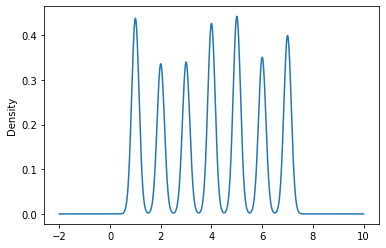

In [32]:
flights_df.DAY_OF_WEEK.plot.kde()

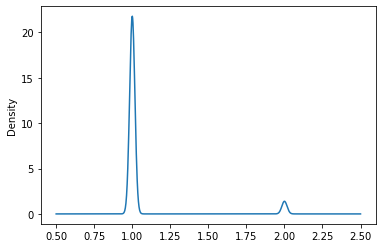

In [33]:
flights_df.MONTH.plot.kde()

In [ ]:
flights_df.AIRLINE.value_counts().plot.bar()

In [ ]:
flights_df.ORIGIN_AIRPORT.value_counts().plot.bar()

4. Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.

### ___Авиакомпания  AS___

In [21]:
print("Количество рейсов AS =",len(flights_df[flights_df.AIRLINE == 'AS']))
print("Количество отмененных рейсов AS =",len(flights_df[(flights_df.CANCELLED == 1)&(flights_df.AIRLINE == 'AS')]))
print("Количество перенаправленных рейсов AS =",len(flights_df[(flights_df.DIVERTED == 1)&(flights_df.AIRLINE == 'AS')]))

Количество рейсов AS = 14149
Количество отмененных рейсов AS = 83
Количество перенаправленных рейсов AS = 46


### ___Авиакомпания  AA___

In [22]:
print("Количество рейсов AA =",len(flights_df[flights_df.AIRLINE == 'AA']))
print("Количество отмененных рейсов AA =",len(flights_df[(flights_df.CANCELLED == 1)&(flights_df.AIRLINE == 'AA')]))
print("Количество перенаправленных рейсов AA =",len(flights_df[(flights_df.DIVERTED == 1)&(flights_df.AIRLINE == 'AA')]))

Количество рейсов AA = 46950
Количество отмененных рейсов AA = 1324
Количество перенаправленных рейсов AA = 110


### ___Авиакомпания  US___

In [23]:
print("Количество рейсов US =",len(flights_df[flights_df.AIRLINE == 'US']))
print("Количество отмененных рейсов US =",len(flights_df[(flights_df.CANCELLED == 1)&(flights_df.AIRLINE == 'US')]))
print("Количество перенаправленных рейсов US =",len(flights_df[(flights_df.DIVERTED == 1)&(flights_df.AIRLINE == 'US')]))

Количество рейсов US = 35591
Количество отмененных рейсов US = 1268
Количество перенаправленных рейсов US = 73


5. Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний.

In [46]:
pd.options.display.max_columns = 35
flights_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2015,2,3,2,WN,740,N647SW,DAL,MCO,605,558.0,-7.0,8.0,606.0,145.0,132.0,115.0,973,901.0,9.0,930,910.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
499996,2015,2,3,2,WN,1711,N8315C,MDW,DEN,605,605.0,0.0,19.0,624.0,165.0,159.0,133.0,895,737.0,7.0,750,744.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
499997,2015,2,3,2,WN,371,N438WN,MDW,PIT,605,NaN,NaN,NaN,NaN,85.0,NaN,NaN,402,NaN,NaN,830,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
499998,2015,2,3,2,WN,1267,N211WN,MDW,TPA,605,605.0,0.0,11.0,616.0,160.0,142.0,126.0,997,922.0,5.0,945,927.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
flights_df['SPEED'] = flights_df['DISTANCE'] / flights_df['AIR_TIME']

In [48]:
speed_df = flights_df[['AIRLINE', 'ORIGIN_AIRPORT', 'AIR_TIME', 'DISTANCE', 'SPEED']]
speed_df

,AIRLINE,ORIGIN_AIRPORT,AIR_TIME,DISTANCE,SPEED
0,AS,ANC,169.0,1448,8.568047
1,AA,LAX,263.0,2330,8.859316
2,US,SFO,266.0,2296,8.631579
3,AA,LAX,258.0,2342,9.077519
4,AS,SEA,199.0,1448,7.276382
...,...,...,...,...,...
499995,WN,DAL,115.0,973,8.460870
499996,WN,MDW,133.0,895,6.729323
499997,WN,MDW,NaN,402,NaN
499998,WN,MDW,126.0,997,7.912698


In [49]:
avg = flights_df.groupby(['AIRLINE'])[['SPEED']].mean()
avg.rename(columns = {'SPEED' : 'AVG_SPEED'}, inplace = True)
avg.head(3)

,AVG_SPEED
AIRLINE,
AA,7.178044
AS,7.191532
B6,6.949548


6. Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов).

In [51]:
import seaborn as sn


Тепловая карта частоты отметы рейсов для аэропортов ATL:



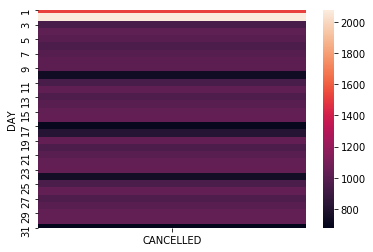

In [54]:
print('\nТепловая карта частоты отметы рейсов для аэропортов ATL:\n')
ATL = flights_df[flights_df['ORIGIN_AIRPORT']=='ATL']
ATL = ATL.groupby('DAY')[['CANCELLED']].count()
sn.heatmap(ATL)


Тепловая карта частоты отметы рейсов для аэропортов SEA:



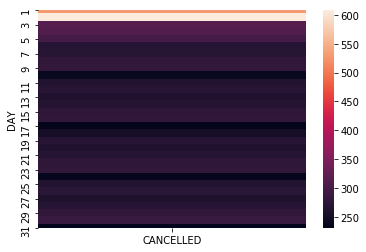

In [55]:
print('\nТепловая карта частоты отметы рейсов для аэропортов SEA:\n')
SEA = flights_df[flights_df['ORIGIN_AIRPORT']=='SEA']
SEA = SEA.groupby('DAY')[['CANCELLED']].count()
sn.heatmap(SEA)

7. Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.

In [64]:
print('\nАэропорт ATL:\n')
ATL = flights_df[flights_df['ORIGIN_AIRPORT']=='ATL']
ATL = ATL[['DEPARTURE_DELAY' , 'ARRIVAL_DELAY']]
ATL


Аэропорт ATL:



,DEPARTURE_DELAY,ARRIVAL_DELAY
109,16.0,14.0
304,19.0,24.0
560,NaN,NaN
729,-1.0,8.0
749,-4.0,7.0
...,...,...
499264,-6.0,-7.0
499552,-8.0,-11.0
499688,33.0,100.0
499880,-5.0,-3.0


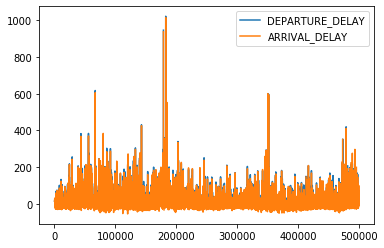

In [59]:
ATL.plot()

In [65]:
print('\nАэропорт SFO:\n')
SFO = flights_df[flights_df['ORIGIN_AIRPORT']=='SFO']
SFO = SFO[['DEPARTURE_DELAY' , 'ARRIVAL_DELAY']]
SFO


Аэропорт SFO:



,DEPARTURE_DELAY,ARRIVAL_DELAY
2,-2.0,5.0
5,-5.0,8.0
8,-11.0,-13.0
17,-6.0,-7.0
92,19.0,26.0
...,...,...
499814,-3.0,-24.0
499815,NaN,NaN
499879,-10.0,-12.0
499952,3.0,-7.0


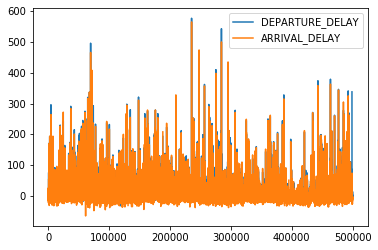

In [61]:
SFO.plot()

In [66]:
print('\nАэропорт MSP:\n')
MSP = flights_df[flights_df['ORIGIN_AIRPORT']=='MSP']
MSP = MSP[['DEPARTURE_DELAY' , 'ARRIVAL_DELAY']]
MSP


Аэропорт MSP:



,DEPARTURE_DELAY,ARRIVAL_DELAY
27,12.0,25.0
127,-7.0,-8.0
172,-4.0,-23.0
471,3.0,-6.0
505,2.0,-19.0
...,...,...
499535,-12.0,-31.0
499731,-1.0,-13.0
499790,-2.0,-17.0
499971,-1.0,-6.0


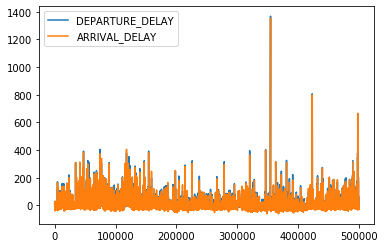

In [63]:
MSP.plot()

 8. Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине.

In [67]:
delayATL = flights_df[flights_df['ORIGIN_AIRPORT']=='ATL']
delayATL = delayATL['CANCELLATION_REASON']
delayATL.dropna()

560       B
4584      B
22912     B
28099     B
30055     A
         ..
497932    B
498372    B
498404    B
498948    B
499029    B
Name: CANCELLATION_REASON, Length: 342, dtype: object

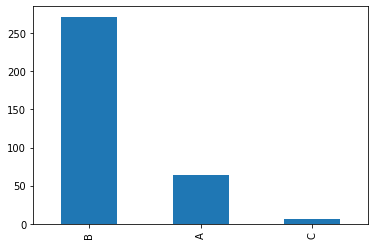

In [68]:
delayATL.value_counts().plot.bar()

In [69]:
delaySFO = flights_df[flights_df['ORIGIN_AIRPORT']=='SFO']
delaySFO = delaySFO['CANCELLATION_REASON']
delaySFO.dropna()

214       B
13949     B
19320     A
33781     B
36500     A
         ..
494411    B
498781    B
499185    B
499650    B
499815    B
Name: CANCELLATION_REASON, Length: 338, dtype: object

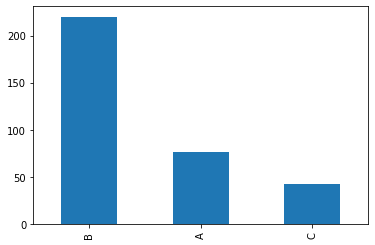

In [70]:
delaySFO.value_counts().plot.bar()

In [71]:
delayMSP = flights_df[flights_df['ORIGIN_AIRPORT']=='MSP']
delayMSP = delayMSP['CANCELLATION_REASON']
delayMSP.dropna()

1928      B
14005     A
14268     B
28644     B
28806     A
         ..
495708    A
497380    B
497509    B
497772    C
499022    B
Name: CANCELLATION_REASON, Length: 158, dtype: object

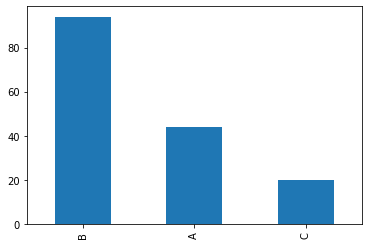

In [72]:
delayMSP.value_counts().plot.bar()

9. Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.

In [43]:
air = flights_df.groupby(['AIRLINE'])[['DEPARTURE_DELAY']].max()
print('Авиакомпания с максимальной задержкой рейсов по отправке: \n')
air.sort_values(by=['DEPARTURE_DELAY'], ascending=False).head(1)

Авиакомпания с максимальной задержкой рейсов по отправке: 



,DEPARTURE_DELAY
AIRLINE,
AA,1988.0


In [45]:
air = flights_df.groupby(['AIRLINE'])[['ARRIVAL_DELAY']].max()
print('Авиакомпания с максимальной задержкой рейсов по прибытию: \n')
air.sort_values(by=['ARRIVAL_DELAY'], ascending=False).head(1)

Авиакомпания с максимальной задержкой рейсов по прибытию: 



,ARRIVAL_DELAY
AIRLINE,
AA,1971.0
